In [ ]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
img = cv.imread("/content/drive/MyDrive/ml_project_data/cat_dog_main/testing/cat/cat.339.jpg")

In [ ]:
cat_array = np.array(img)

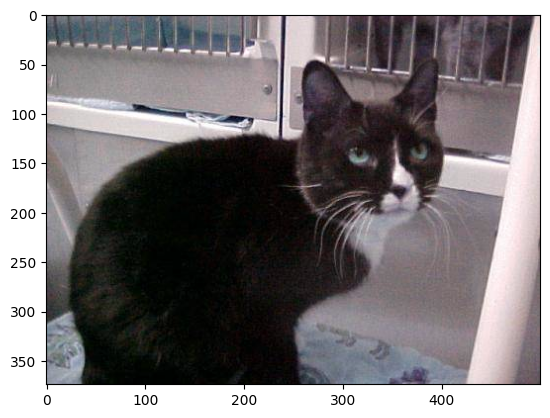

In [ ]:
plt.imshow(img)

In [ ]:
training_path=("/content/drive/MyDrive/ml_project_data/cat_dog_main/training")
testing_path=("/content/drive/MyDrive/ml_project_data/cat_dog_main/testing")
validation_path=("/content/drive/MyDrive/ml_project_data/cat_dog_main/validate")

In [ ]:
training_folders=os.listdir(training_path)
testing_folders=os.listdir(testing_path)
validation_folders=os.listdir(validation_path)

In [ ]:
training_folders

['cat', 'dog']

In [ ]:
classes=os.listdir(training_path)

In [ ]:
classes

['cat', 'dog']

In [ ]:
for i in classes:
  print('training data size:',i,len(os.listdir(training_path+"/"+i)))

training data size: cat 100
training data size: dog 100


In [ ]:
for i in classes:
  print('testing data size:',i,len(os.listdir(testing_path+"/"+i)))

testing data size: cat 20
testing data size: dog 20


In [ ]:
for i in classes:
  print('validation data size:',i,len(os.listdir(validation_path+"/"+i)))

validation data size: cat 21
validation data size: dog 20


In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNEL=3

In [ ]:
testing_dataset=keras.preprocessing.image_dataset_from_directory(testing_path,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)
)

Found 40 files belonging to 2 classes.


In [ ]:
training_dataset=keras.preprocessing.image_dataset_from_directory(training_path,shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 200 files belonging to 2 classes.


In [ ]:
validation_dataset=keras.preprocessing.image_dataset_from_directory(validation_path,shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 41 files belonging to 2 classes.


In [ ]:
for image_for_predict, label_for_predict in testing_dataset.take(1):
  image_for_predict_np=image_for_predict.numpy().astype('uint8')
  label_for_predict_np=label_for_predict.numpy()

In [ ]:
classes=training_dataset.class_names
classes

['cat', 'dog']

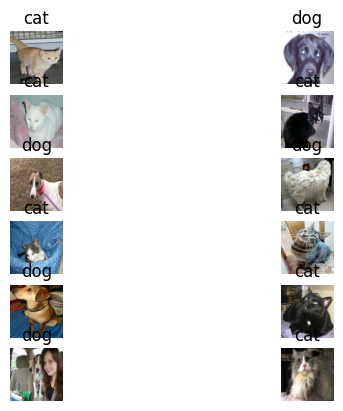

In [ ]:
for image_batch,label_batch in testing_dataset.take(1):
  for i in range(12):
    plt.subplot(6,2,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[label_batch[i].numpy()])
    plt.axis('off')


In [ ]:
def myfunction(dataset):
  for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(8,8))
    for i in range(12):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(classes[label_batch[i].numpy()])
      plt.axis("off")




In [ ]:
#cache and prefech(CPU AND GPU)
training_dataset=training_dataset.take(3).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE) #Training data changed from 10 to 3 for reduced batch size for faster computation.
validation_dataset=validation_dataset.take(3).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE) #Validation data changed from 10 to 3 for reduced batch size for faster computation.
testing_dataset=testing_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Recycling and Resizing and preprocessing
resize_and_rescale= keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1/255)
])

In [ ]:
# Data Augmentation and preprodcessing
data_augmentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical")
])


In [ ]:
#bulding the model
INPUT_SHAPE=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)

In [ ]:
#creating the model
model=keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    keras.layers.MaxPooling2D((2,2)),

    # Flattening the image
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(3,activation="softmax")
])

In [ ]:
model.build(input_shape=INPUT_SHAPE)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False
    ),
    metrics=["accuracy"]
)


In [ ]:
model.fit(training_dataset,
          batch_size=BATCH_SIZE,
          validation_data=validation_dataset,
          epochs=10
)

Epoch 1/10
3/3 [==============================] - 62s 15s/step - loss: 0.9736 - accuracy: 0.5208 - val_loss: 0.9547 - val_accuracy: 0.4878
Epoch 2/10
3/3 [==============================] - 16s 6s/step - loss: 0.8456 - accuracy: 0.5208 - val_loss: 0.7399 - val_accuracy: 0.4634
Epoch 3/10
3/3 [==============================] - 21s 7s/step - loss: 0.7368 - accuracy: 0.4583 - val_loss: 0.7049 - val_accuracy: 0.4878
Epoch 4/10
3/3 [==============================] - 16s 5s/step - loss: 0.7427 - accuracy: 0.4688 - val_loss: 0.7332 - val_accuracy: 0.4878
Epoch 5/10
3/3 [==============================] - 15s 6s/step - loss: 0.6989 - accuracy: 0.5208 - val_loss: 0.7079 - val_accuracy: 0.4878
Epoch 6/10
3/3 [==============================] - 15s 5s/step - loss: 0.7171 - accuracy: 0.4688 - val_loss: 0.7031 - val_accuracy: 0.4878
Epoch 7/10
3/3 [==============================] - 15s 6s/step - loss: 0.6934 - accuracy: 0.5417 - val_loss: 0.7014 - val_accuracy: 0.5366
Epoch 8/10
3/3 [=================

In [ ]:
model.evaluate(testing_dataset)

2/2 [==============================] - 2s 1s/step - loss: 0.6980 - accuracy: 0.4750


[0.698022723197937, 0.4749999940395355]

In [ ]:
model.predict()

In [ ]:
model.save("/content/drive/MyDrive/Classroom/deeplearing")

In [ ]:
model.save("/content/drive/MyDrive/Classroom/deeplearing/model.keras")

In [ ]:
score_array = model.predict(image_for_predict_np)

1/1 [==============================] - 5s 5s/step


In [ ]:
for i in score_array:
  print(i)


[0.5383885  0.4578493  0.00376232]
[0.50204    0.49589875 0.00206127]
[0.5016655  0.49548623 0.00284838]
[0.4719279  0.52141744 0.00665465]
[0.48670453 0.50721556 0.0060799 ]
[0.5038559  0.49510285 0.00104127]
[0.4879308  0.50919414 0.00287504]
[0.4858339  0.51068103 0.00348493]
[0.47697124 0.52107584 0.00195285]
[0.51308155 0.48313144 0.00378702]
[0.4911837  0.50687027 0.00194606]
[0.5096157  0.4881694  0.00221479]
[0.5264042  0.47176772 0.00182801]
[0.47831282 0.51981455 0.00187266]
[0.49881816 0.49796453 0.00321735]
[0.49946347 0.49845752 0.00207899]
[0.5201637  0.47691077 0.00292541]
[0.5031077  0.49103582 0.00585647]
[0.4688662  0.52971447 0.00141923]
[0.49964595 0.49380454 0.00654964]
[0.4939944  0.4958017  0.01020397]
[0.49749157 0.49915692 0.0033515 ]
[0.5098507  0.48817268 0.00197668]
[0.50266117 0.4883225  0.00901647]
[0.48130134 0.51591957 0.00277907]
[0.5334665  0.45419136 0.01234209]
[0.5056426  0.48933277 0.00502465]
[0.4900508  0.50750035 0.00244889]
[0.4998146  0.498246

In [ ]:
classes[np.argmax(score_array[8])]

'dog'

In [ ]:
classes[label_for_predict_np[8]]

'dog'